In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=824a75fb107fb76aef12c289c36517748661ea94dc1293593329e144c49f3c06
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer
bnltk = NLTKTokenizer()

In [3]:
df_train = pd.read_csv("/kaggle/input/sentnob-stem/Train.csv")

In [4]:
df_train.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_csv("/kaggle/input/sentnob-stem/Val.csv")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [15]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [16]:
# Example usage:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_val['Data'] = df_val['Data'].apply(apply_bangla_stemming)

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
appl

In [17]:
df_train['Data']

0        মুগ্ধ হয় গেল মামু. আর তোমায় কি কমু. বলো তোমায় ...
1        এই কুত্ত বাচ্চা জন্য দেশ আজ এমন অবস্তায় এই তিন...
2                                      ভাই আপন কথা যাদু রয়
3                                      উওর আম অনেক ভাল লাগ
4        আম নিজ গাড়ী নিয়ে কি সাজেক যেত পারবো না ? প্রা...
                               ...                        
12570    বর্ডারে অনেক লেট হয় যাওয়াতে আম জিপে করে চলে যা...
12571    আম সোন বাংলা এমন রক্ষক নাম ভক্ষক কোন জায়গা হবে...
12572    ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশ রান্না কর...
12573       বাংলাদেশ আম পুলিশ চাই না এই ধরনে পুলিশ দরক নাই
12574               বসুন্ধ শাখা হাজি বিরিয়ানি একবারে ফালতু
Name: Data, Length: 12575, dtype: object

In [18]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

364


In [19]:
df_train['Data'] 

0        মুগ্ধ হয় গেল মামু. আর তোমায় কি কমু. বলো তোমায় ...
1        এই কুত্ত বাচ্চা জন্য দেশ আজ এমন অবস্তায় এই তিন...
2                                      ভাই আপন কথা যাদু রয়
3                                      উওর আম অনেক ভাল লাগ
4        আম নিজ গাড়ী নিয়ে কি সাজেক যেত পারবো না ? প্রা...
                               ...                        
12570    বর্ডারে অনেক লেট হয় যাওয়াতে আম জিপে করে চলে যা...
12571    আম সোন বাংলা এমন রক্ষক নাম ভক্ষক কোন জায়গা হবে...
12572    ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশ রান্না কর...
12573       বাংলাদেশ আম পুলিশ চাই না এই ধরনে পুলিশ দরক নাই
12574               বসুন্ধ শাখা হাজি বিরিয়ানি একবারে ফালতু
Name: Data, Length: 12575, dtype: object

In [20]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [21]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [22]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.0 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=779ab541fce8fe553f5ed892372344f743c5da1406b24fb2d06ddc0482e2e0be
  Stored in directory: /roo

In [23]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [24]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [25]:
print(trn)

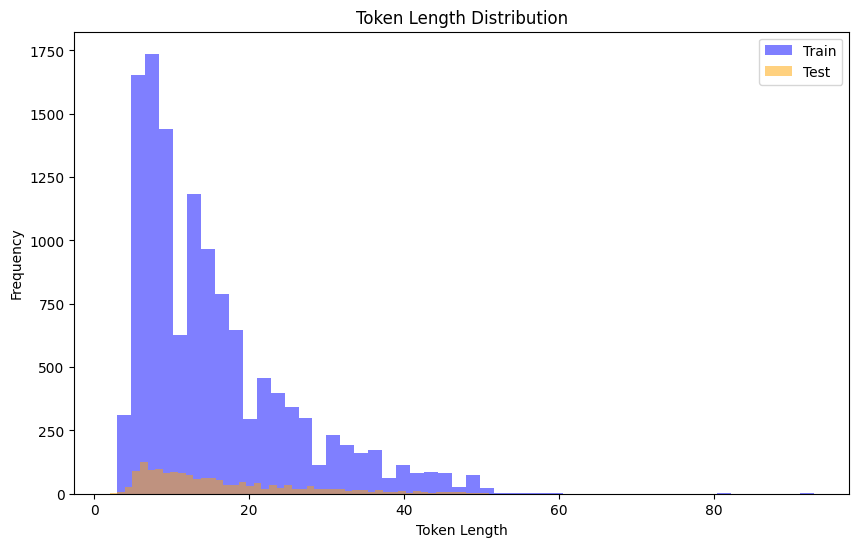

In [26]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [27]:
model = t.get_classifier()

In [28]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [29]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [30]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 913s 565ms/step - loss: 0.8766 - accuracy: 0.6105 - val_loss: 0.7176 - val_accuracy: 0.6969
Epoch 2/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.6840 - accuracy: 0.7159 - val_loss: 0.6771 - val_accuracy: 0.7186
Epoch 3/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.5554 - accuracy: 0.7791 - val_loss: 0.6684 - val_accuracy: 0.7307
Epoch 4/10
1572/1572 [==============================] - 884s 563ms/step - loss: 0.4299 - accuracy: 0.8387 - val_loss: 0.6509 - val_accuracy: 0.7486
Epoch 5/10
1572/1572 [==============================] - 884s 563ms/step - loss: 0.3300 - accuracy: 0.8862 - val_loss: 0.7806 - val_accuracy: 0.7498
Epoch 6/10
1572/1572 [==============================] - 884s 562ms/step - loss: 0.2449 - accuracy: 0.9176 - val_loss: 0.7524 - val_accuracy: 0.7505
Epoch 7/10
1572/1572 [===========================

In [31]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [32]:
classes=t.get_classes()

In [33]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 9s 121ms/step
              precision    recall  f1-score   support

    Negative       0.81      0.84      0.82       590
     Neutral       0.59      0.56      0.57       354
    Positive       0.80      0.79      0.79       623

    accuracy                           0.76      1567
   macro avg       0.73      0.73      0.73      1567
weighted avg       0.75      0.76      0.75      1567



In [34]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [35]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [36]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [37]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [38]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")